# Restaurant Orders Analysis

Using datafiles orders.csv and menu.csv, we will find out:

1) Which food items drive the highest and lowest revenue?

2) Which cuisines make up the highest and lowest revenue and what is their break-up?

3) At what times of each day are the highest and lowest sales recorded?

In [1]:
import pandas as pd
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /content


Read Orders and menu file

In [2]:
#read orders data
orders_df = pd.read_csv('sample_data/order_details.csv')

orders_df.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,11:38:36 AM,109.0
1,2,2,1/1/23,11:57:40 AM,108.0
2,3,2,1/1/23,11:57:40 AM,124.0
3,4,2,1/1/23,11:57:40 AM,117.0
4,5,2,1/1/23,11:57:40 AM,129.0


In [3]:
orders_df.tail()

,order_details_id,order_id,order_date,order_time,item_id
12229,12230,5369,3/31/23,10:05:04 PM,109.0
12230,12231,5369,3/31/23,10:05:04 PM,129.0
12231,12232,5369,3/31/23,10:05:04 PM,120.0
12232,12233,5369,3/31/23,10:05:04 PM,122.0
12233,12234,5370,3/31/23,10:15:48 PM,122.0


1st order on 1/1/23 and last order on 3/31/23. So, there is around 3 months of data


In [4]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12234 non-null  int64  
 1   order_id          12234 non-null  int64  
 2   order_date        12234 non-null  object 
 3   order_time        12234 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 478.0+ KB


Here we need to convert order_date and order_time to timestamp data type and item id to int data type

In [5]:
orders_df['timestamp'] = orders_df['order_date'] + ' ' + orders_df['order_time']
# Convert the 'timetamp' column to datetime objects:
orders_df['timestamp'] = pd.to_datetime(orders_df['timestamp'])

orders_df.info()

<ipython-input-5-07c7f3f1139e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders_df['timestamp'] = pd.to_datetime(orders_df['timestamp'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12234 non-null  int64         
 1   order_id          12234 non-null  int64         
 2   order_date        12234 non-null  object        
 3   order_time        12234 non-null  object        
 4   item_id           12097 non-null  float64       
 5   timestamp         12234 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 573.6+ KB


Drop the rows with missing item id values as we won't be able to join these rows with menu file.

In [6]:
orders_df = orders_df.dropna(subset=['item_id'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   order_date        12097 non-null  object        
 3   order_time        12097 non-null  object        
 4   item_id           12097 non-null  float64       
 5   timestamp         12097 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 661.6+ KB


In [7]:
orders_df['item_id'] = orders_df['item_id'].astype(int)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   order_date        12097 non-null  object        
 3   order_time        12097 non-null  object        
 4   item_id           12097 non-null  int64         
 5   timestamp         12097 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 661.6+ KB


<ipython-input-7-2a432880f686>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['item_id'] = orders_df['item_id'].astype(int)


Now read in the menu-tems.csv file

In [8]:
menu_df = pd.read_csv('sample_data/menu_items.csv')
menu_df.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [9]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


Now join the 2 dataframes orders.df and menu.df

In [10]:
orders_menu_df = pd.merge(orders_df, menu_df, how='left', left_on='item_id', right_on='menu_item_id' )
orders_menu_df.head()

,order_details_id,order_id,order_date,order_time,item_id,timestamp,menu_item_id,item_name,category,price
0,1,1,1/1/23,11:38:36 AM,109,2023-01-01 11:38:36,109,Korean Beef Bowl,Asian,17.95
1,2,2,1/1/23,11:57:40 AM,108,2023-01-01 11:57:40,108,Tofu Pad Thai,Asian,14.50
2,3,2,1/1/23,11:57:40 AM,124,2023-01-01 11:57:40,124,Spaghetti,Italian,14.50
3,4,2,1/1/23,11:57:40 AM,117,2023-01-01 11:57:40,117,Chicken Burrito,Mexican,12.95
4,5,2,1/1/23,11:57:40 AM,129,2023-01-01 11:57:40,129,Mushroom Ravioli,Italian,15.50


Drop the menu_items_id as it will be duplicate

In [11]:
orders_menu_df = orders_menu_df.drop('menu_item_id', axis=1)
orders_menu_df.head()

,order_details_id,order_id,order_date,order_time,item_id,timestamp,item_name,category,price
0,1,1,1/1/23,11:38:36 AM,109,2023-01-01 11:38:36,Korean Beef Bowl,Asian,17.95
1,2,2,1/1/23,11:57:40 AM,108,2023-01-01 11:57:40,Tofu Pad Thai,Asian,14.50
2,3,2,1/1/23,11:57:40 AM,124,2023-01-01 11:57:40,Spaghetti,Italian,14.50
3,4,2,1/1/23,11:57:40 AM,117,2023-01-01 11:57:40,Chicken Burrito,Mexican,12.95
4,5,2,1/1/23,11:57:40 AM,129,2023-01-01 11:57:40,Mushroom Ravioli,Italian,15.50


Calculate Revenue and tax. considering gst at 18%.
Add a gst column first. Round gst to 2 deimal places

In [12]:
orders_menu_df['gst'] = (orders_menu_df['price'] * 0.18).round(2)
orders_menu_df.head()

,order_details_id,order_id,order_date,order_time,item_id,timestamp,item_name,category,price,gst
0,1,1,1/1/23,11:38:36 AM,109,2023-01-01 11:38:36,Korean Beef Bowl,Asian,17.95,3.23
1,2,2,1/1/23,11:57:40 AM,108,2023-01-01 11:57:40,Tofu Pad Thai,Asian,14.50,2.61
2,3,2,1/1/23,11:57:40 AM,124,2023-01-01 11:57:40,Spaghetti,Italian,14.50,2.61
3,4,2,1/1/23,11:57:40 AM,117,2023-01-01 11:57:40,Chicken Burrito,Mexican,12.95,2.33
4,5,2,1/1/23,11:57:40 AM,129,2023-01-01 11:57:40,Mushroom Ravioli,Italian,15.50,2.79


Now, add total revenue column

In [13]:
orders_menu_df['total_revenue'] = orders_menu_df['price'] + orders_menu_df['gst']
orders_menu_df.head()

,order_details_id,order_id,order_date,order_time,item_id,timestamp,item_name,category,price,gst,total_revenue
0,1,1,1/1/23,11:38:36 AM,109,2023-01-01 11:38:36,Korean Beef Bowl,Asian,17.95,3.23,21.18
1,2,2,1/1/23,11:57:40 AM,108,2023-01-01 11:57:40,Tofu Pad Thai,Asian,14.50,2.61,17.11
2,3,2,1/1/23,11:57:40 AM,124,2023-01-01 11:57:40,Spaghetti,Italian,14.50,2.61,17.11
3,4,2,1/1/23,11:57:40 AM,117,2023-01-01 11:57:40,Chicken Burrito,Mexican,12.95,2.33,15.28
4,5,2,1/1/23,11:57:40 AM,129,2023-01-01 11:57:40,Mushroom Ravioli,Italian,15.50,2.79,18.29


In [14]:
orders_menu_df.describe()

,order_details_id,order_id,item_id,timestamp,price,gst,total_revenue
count,12097.000000,12097.000000,12097.000000,12097,12097.000000,12097.000000,12097.000000
mean,6118.950897,2692.569149,115.202282,2023-02-15 03:39:53.237000960,13.161767,2.368572,15.530339
min,1.000000,1.000000,101.000000,2023-01-01 11:38:36,5.000000,0.900000,5.900000
25%,3064.000000,1353.000000,107.000000,2023-01-23 16:21:26,10.500000,1.890000,12.390000
50%,6119.000000,2711.000000,114.000000,2023-02-14 20:00:33,13.950000,2.510000,16.460000
75%,9175.000000,4020.000000,123.000000,2023-03-09 15:30:34,16.500000,2.970000,19.470000
max,12234.000000,5370.000000,132.000000,2023-03-31 22:15:48,19.950000,3.590000,23.540000
std,3531.337208,1545.826452,9.387580,NaN,3.986392,0.717260,4.703652


Finding out best and worst selling items

In [15]:
(orders_menu_df
 .groupby('item_name')['total_revenue']
 .sum()
 .sort_values(ascending=False))

,total_revenue
item_name,
Korean Beef Bowl,12453.84
Spaghetti & Meatballs,9954.60
Tofu Pad Thai,9615.82
Cheeseburger,9596.18
Hamburger,9504.16
Orange Chicken,8878.32
Eggplant Parmesan,8400.00
Steak Torta,8048.94
Chicken Parmesan,7709.52


Visualizing the above as a bar chart

<Axes: ylabel='item_name'>

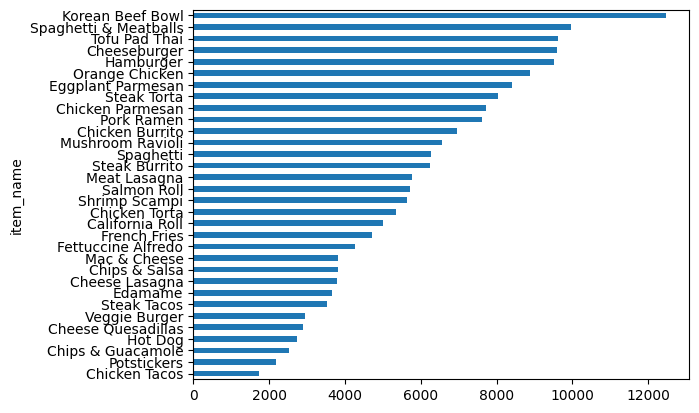

In [16]:
(orders_menu_df
 .groupby('item_name')['total_revenue']
 .sum()
 .sort_values(ascending=True)
 .plot(kind='barh'))

Here we can see that the highest selling item is 'Korean Beef Bowl' while the lowest selling item is 'Chicken Tacos'

Identifying the best and worst selling items by cuisine

<Axes: ylabel='item_name'>

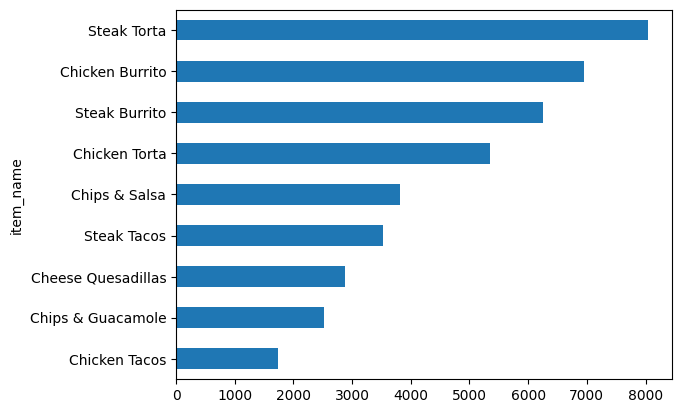

In [17]:
(orders_menu_df
 .query("category == 'Mexican'")
 .groupby('item_name')['total_revenue']
 .sum()
 .sort_values(ascending=True)
 .plot(kind='barh'))

We can also look at cuisine wise break-up of revenue

<Axes: ylabel='category'>

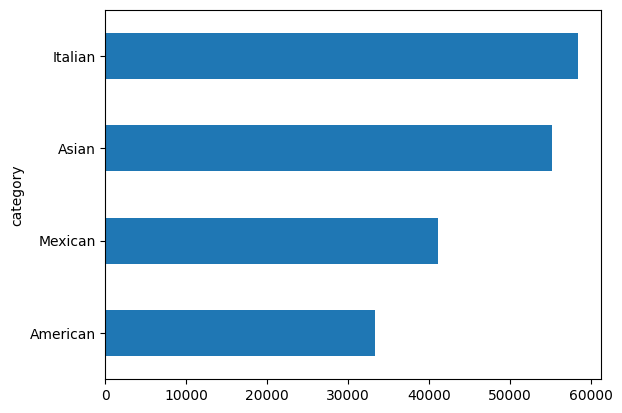

In [18]:
(orders_menu_df
 .groupby('category')['total_revenue']
 .sum()
 .sort_values(ascending=True)
 .plot(kind='barh'))

Here we can see thet Italian is the best selling cuisine while American is the worst selling cuisine

We can also visualize this as a pie chart

<Axes: ylabel='total_revenue'>

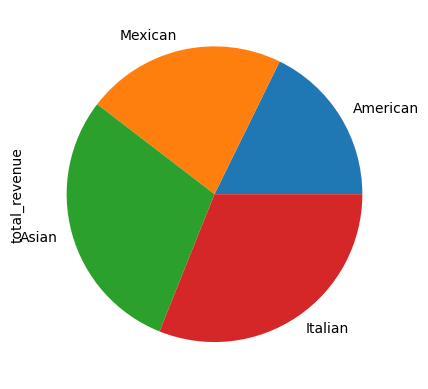

In [19]:
(orders_menu_df
 .groupby('category')['total_revenue']
 .sum()
 .sort_values(ascending=True)
 .plot(kind='pie'))

Finding Peak times when restaurant is busiest

<ipython-input-20-83fe47011f48>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_menu_df.set_index('timestamp').resample('M')['total_revenue'].sum().plot(ylim=0)


<Axes: xlabel='timestamp'>

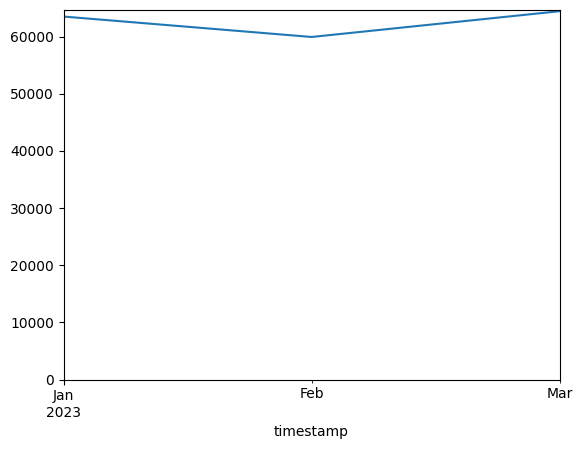

In [20]:
orders_menu_df.set_index('timestamp').resample('M')['total_revenue'].sum().plot(ylim=0)


In [21]:
#Add a day of week and hour column to orders_menu_df

orders_menu_df["dayofweek"] = orders_menu_df["timestamp"].dt.day_name()
orders_menu_df["hour"] = orders_menu_df["timestamp"].dt.hour
orders_menu_df.head()

,order_details_id,order_id,order_date,order_time,item_id,timestamp,item_name,category,price,gst,total_revenue,dayofweek,hour
0,1,1,1/1/23,11:38:36 AM,109,2023-01-01 11:38:36,Korean Beef Bowl,Asian,17.95,3.23,21.18,Sunday,11
1,2,2,1/1/23,11:57:40 AM,108,2023-01-01 11:57:40,Tofu Pad Thai,Asian,14.50,2.61,17.11,Sunday,11
2,3,2,1/1/23,11:57:40 AM,124,2023-01-01 11:57:40,Spaghetti,Italian,14.50,2.61,17.11,Sunday,11
3,4,2,1/1/23,11:57:40 AM,117,2023-01-01 11:57:40,Chicken Burrito,Mexican,12.95,2.33,15.28,Sunday,11
4,5,2,1/1/23,11:57:40 AM,129,2023-01-01 11:57:40,Mushroom Ravioli,Italian,15.50,2.79,18.29,Sunday,11


Create Pivot table to visualize revenue by the hour of day

<Axes: xlabel='hour'>

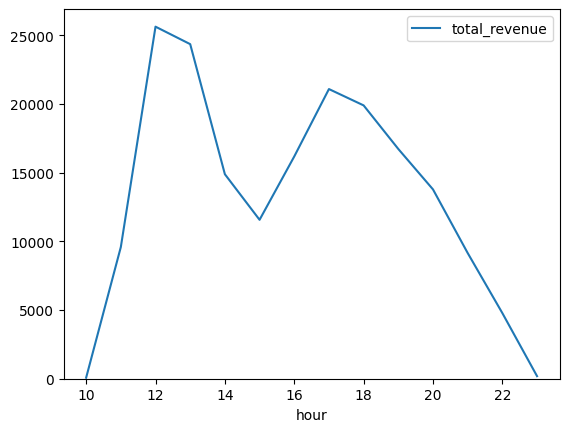

In [22]:
orders_menu_df.pivot_table(index="hour", values="total_revenue", aggfunc="sum").plot(ylim=0)

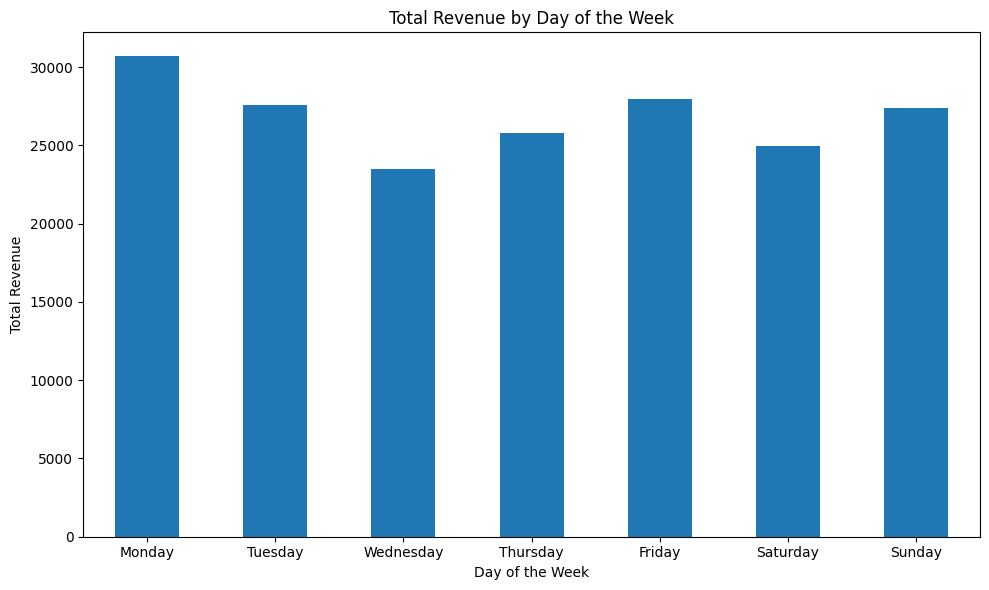

In [23]:
# Group data by day of the week and sum total revenue
daily_revenue = orders_menu_df.groupby('dayofweek')['total_revenue'].sum()

# Sort the days of the week in a specific order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue = daily_revenue.reindex(day_order)

# Create a bar plot to visualize the daily revenue
daily_revenue.plot(kind='bar', figsize=(10, 6))

# Customize the plot
import matplotlib.pyplot as plt
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Rearranging the bar plot in decreasing order of revenue.

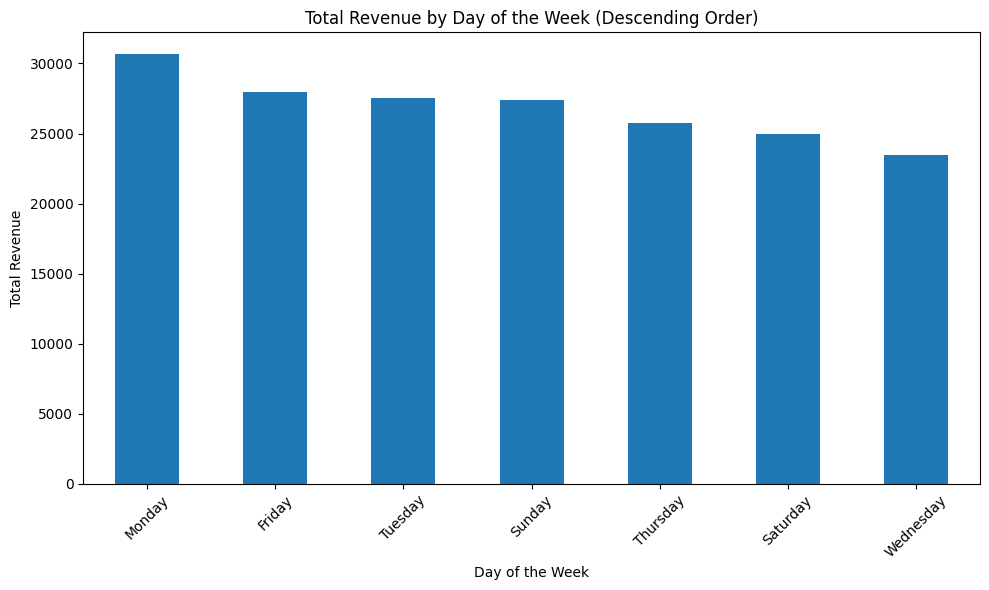

In [24]:
import matplotlib.pyplot as plt

daily_revenue = orders_menu_df.groupby('dayofweek')['total_revenue'].sum()

# Sort daily_revenue in descending order
daily_revenue = daily_revenue.sort_values(ascending=False)

# Create the bar plot
daily_revenue.plot(kind='bar', figsize=(10, 6))
plt.title('Total Revenue by Day of the Week (Descending Order)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Checking the overall revenue pattern across different days of week and different times

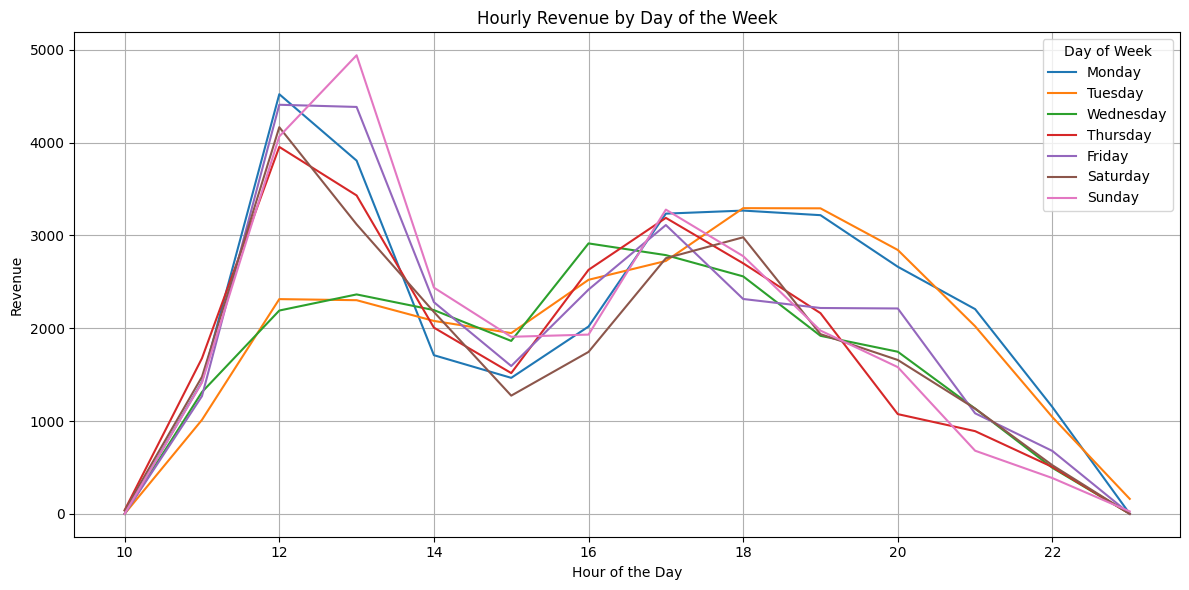

In [25]:
import matplotlib.pyplot as plt

# Create a pivot table with day of the week as index and hour as columns
hourly_revenue_by_day = orders_menu_df.pivot_table(
    index='dayofweek',
    columns='hour',
    values='total_revenue',
    aggfunc='sum',
    fill_value=0  # Fill missing values with 0
)

# Reorder the days of the week for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_revenue_by_day = hourly_revenue_by_day.reindex(day_order)

# Transpose the pivot table
hourly_revenue_by_day = hourly_revenue_by_day.T  # Transpose using .T

# Create the line chart
hourly_revenue_by_day.plot(kind='line', figsize=(12, 6))
plt.title('Hourly Revenue by Day of the Week')
plt.ylabel('Revenue')  # Changed from xlabel
plt.xlabel('Hour of the Day')  # Changed from ylabel
plt.legend(title='Day of Week')
plt.grid(True)
plt.tight_layout()
plt.show()

Including day of week as well

In [26]:
orders_menu_df.pivot_table(
    index="hour",
    columns="dayofweek",
    values="total_revenue",
    aggfunc="sum")

dayofweek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
10,NaN,NaN,35.28,NaN,39.47,NaN,NaN
11,1268.40,1421.97,1476.72,1415.48,1676.67,1012.70,1312.29
12,4409.15,4522.84,4167.20,4067.67,3954.80,2314.13,2191.01
13,4385.67,3807.07,3120.11,4942.78,3431.79,2302.52,2364.69
14,2281.21,1709.59,2175.60,2438.02,2006.76,2079.03,2195.78
15,1592.94,1465.39,1273.64,1908.05,1516.72,1947.93,1863.51
16,2416.97,2018.62,1745.04,1931.65,2629.83,2522.40,2914.67
17,3112.62,3235.57,2754.68,3278.93,3189.78,2725.28,2788.41
18,2315.43,3268.43,2980.70,2777.44,2700.11,3294.62,2559.16


Visualizing the above data as heatmap to find out which times of which days have maximum and minimum revenue

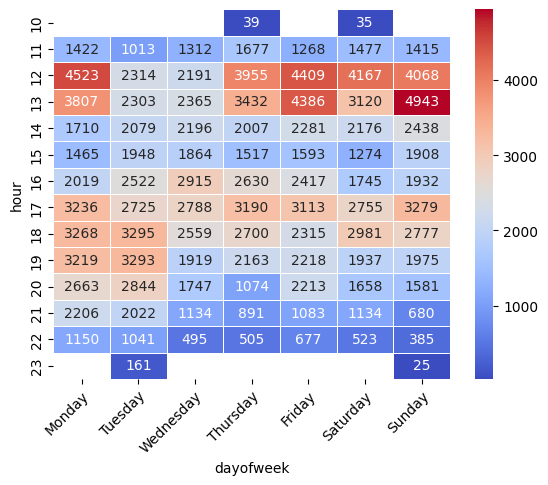

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order of days
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create the pivot table with the specified column order
pivot_table = orders_menu_df.pivot_table(
    index="hour",
    columns="dayofweek",
    values="total_revenue",
    aggfunc="sum"
).reindex(columns=day_order)  # Reindex columns for desired order

# Round the values in the pivot table
pivot_table = pivot_table.round()

# Create the heatmap
ax = sns.heatmap(
     pivot_table,
     cmap="coolwarm",
     annot=True,
     fmt="g",
     linewidths=0.5
)

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()

**Conclusions**:

1) Sunday 11 a.m to 1 p.m. brings the maximum revenue.

2) Sunday 9 p.m. to 10 p.m. brings the least revenue.

3) There are some trades beyond working hours on Tuesday, Thursday, Saturday and Sunday. This needs to be looked into.

4) 9 p.m.- 10 p.m. sees sluggish sales from Wednesday to Sunday. Management needs to investigate and come up with better promotion strategy for these days and times.